# **Data Reading from CSV file**

In [1]:
import pandas as pd
data = pd.read_csv('spam.csv', sep = '\t', names = ['label','message'])

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [ ]:
data['message']

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
text = data['message']
class_label = data['label']

In [ ]:
class_label

,label
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


## Label Preparation

In [ ]:
import numpy as np
from keras.utils import to_categorical
classes_list = ["ham","spam"]
label_index = class_label.apply(classes_list.index)
label1 = np.asarray(label_index)

In [ ]:
label1

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
label_sms = to_categorical(np.asarray(label1))

In [ ]:
label_sms.shape

(5572, 2)

## Feature Extraction

In [ ]:
data['word_count'] = data['message'].apply(lambda x: len(str(x).split(" ")))
data

,label,message,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30
5568,ham,Will ü b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26


In [ ]:
print(data[['message','word_count']].head())
data['word_count'].to_csv('/content/drive/MyDrive/Colab Notebooks/features.csv')

                                             message  word_count
0  Go until jurong point, crazy.. Available only ...          20
1                      Ok lar... Joking wif u oni...           6
2  Free entry in 2 a wkly comp to win FA Cup fina...          28
3  U dun say so early hor... U c already then say...          11
4  Nah I don't think he goes to usf, he lives aro...          13


In [ ]:
#Number of characters
data['char_count'] = data['message'].str.len() ## this also includes spaces
print(data[['message','char_count']].head())

                                             message  char_count
0  Go until jurong point, crazy.. Available only ...         111
1                      Ok lar... Joking wif u oni...          29
2  Free entry in 2 a wkly comp to win FA Cup fina...         155
3  U dun say so early hor... U c already then say...          49
4  Nah I don't think he goes to usf, he lives aro...          61


In [ ]:
data

,label,message,word_count,char_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,160
5568,ham,Will ü b going to esplanade fr home?,8,36
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57
5570,ham,The guy did some bitching but I acted like i'd...,26,125


In [ ]:
#Hastag count
data['hastags'] = data['message'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data['hastags']

,hastags
0,0
1,0
2,0
3,0
4,0
...,...
5567,0
5568,0
5569,0
5570,0


In [ ]:
#Number of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['message'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['message','stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,message,stopwords
0,"Go until jurong point, crazy.. Available only ...",4
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,5
3,U dun say so early hor... U c already then say...,2
4,"Nah I don't think he goes to usf, he lives aro...",5


In [ ]:
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
#Number of numerics
data['numerics'] = data['message'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['message','numerics']].head()

,message,numerics
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
#Number of Uppercase words
data['upper'] = data['message'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['message','upper']].head()

,message,upper
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,U dun say so early hor... U c already then say...,2
4,"Nah I don't think he goes to usf, he lives aro...",1


In [ ]:
data

,label,message,word_count,char_count,hastags,stopwords,numerics,upper
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,0,4,0,0
1,ham,Ok lar... Joking wif u oni...,6,29,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,0,5,2,2
3,ham,U dun say so early hor... U c already then say...,11,49,0,2,0,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,0,5,0,1
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,160,0,8,3,2
5568,ham,Will ü b going to esplanade fr home?,8,36,0,1,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57,0,4,0,0
5570,ham,The guy did some bitching but I acted like i'd...,26,125,0,11,0,1


In [ ]:
features = data[['word_count','char_count','stopwords','hastags','numerics','upper' ]]
features

,word_count,char_count,stopwords,hastags,numerics,upper
0,20,111,4,0,0,0
1,6,29,0,0,0,0
2,28,155,5,0,2,2
3,11,49,2,0,0,2
4,13,61,5,0,0,1
...,...,...,...,...,...,...
5567,30,160,8,0,3,2
5568,8,36,1,0,0,0
5569,10,57,4,0,0,0
5570,26,125,11,0,0,1


## Dataset Splitting for Training and Testing

In [ ]:
# data split into train and text
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label1, test_size=0.3, random_state=2)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

## Model Training and Prediction

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model_SVM = SVC()
model_SVM=model_SVM.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_pred_SVM = model_SVM.predict(x_test)
print("SVM")
print("Accuracy score =", accuracy_score(y_test, y_pred_SVM))
print(metrics.classification_report(y_test, y_pred_SVM))

SVM
Accuracy score = 0.9270334928229665
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1445
           1       0.81      0.60      0.69       227

    accuracy                           0.93      1672
   macro avg       0.88      0.79      0.83      1672
weighted avg       0.92      0.93      0.92      1672



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("random")
print("Accuracy score =", accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

random
Accuracy score = 0.9599282296650717
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1445
           1       0.93      0.77      0.84       227

    accuracy                           0.96      1672
   macro avg       0.94      0.88      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)
print("Logistic Regression")
print("Accuracy score =", accuracy_score(y_test, y_pred_LR))
print(metrics.classification_report(y_test, y_pred_LR ))

Logistic Regression
Accuracy score = 0.9407894736842105
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1445
           1       0.88      0.65      0.75       227

    accuracy                           0.94      1672
   macro avg       0.91      0.82      0.86      1672
weighted avg       0.94      0.94      0.94      1672



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(x_train,y_train)
y_pred_KNN = neigh.predict(x_test)
print("KNN")
print("Accuracy score =", accuracy_score(y_test, y_pred_KNN))
print(metrics.classification_report(y_test, y_pred_KNN ))

KNN
Accuracy score = 0.9401913875598086
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1445
           1       0.84      0.69      0.76       227

    accuracy                           0.94      1672
   macro avg       0.90      0.84      0.86      1672
weighted avg       0.94      0.94      0.94      1672



In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train,y_train)
y_pred_naive = naive.predict(x_test)
print("Naive Bayes")
print("Accuracy score =", accuracy_score(y_test, y_pred_naive))
print(metrics.classification_report(y_test, y_pred_naive ))

Naive Bayes
Accuracy score = 0.9258373205741627
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1445
           1       0.75      0.69      0.72       227

    accuracy                           0.93      1672
   macro avg       0.85      0.83      0.84      1672
weighted avg       0.92      0.93      0.92      1672



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred_decision = decision.predict(x_test)
print("Decision Tree")
print("Accuracy score =", accuracy_score(y_test, y_pred_decision))
print(metrics.classification_report(y_test, y_pred_decision ))

Decision Tree
Accuracy score = 0.9425837320574163
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1445
           1       0.82      0.74      0.78       227

    accuracy                           0.94      1672
   macro avg       0.89      0.86      0.87      1672
weighted avg       0.94      0.94      0.94      1672



# Optimization Demo

In [ ]:
!pip install niapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

In [ ]:
class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [ ]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lstm150_Handcraft185.csv")
label=data["targetClass Label"]
features=data.drop(['targetClass Label', 'id'], axis=1)
X=np.asarray(features)
y=np.asarray(label)
feature_names = np.asarray(list(features))
classes_list = ['Non-clickbait', 'Clickbait']

#Data Splitting for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=34)

NameError: name 'pd' is not defined

In [ ]:
X_train.shape

(11722, 334)

In [ ]:
problem = SVMFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=2)
algorithm = ParticleSwarmOptimization(population_size=5, seed=1234)
best_features, best_fitness = algorithm.run(task)

NameError: name 'X_train' is not defined

In [ ]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

Number of selected features: 151
Selected features: Pt_Number of NNP, Pt_Number of tokens, Pt_Word length of postText, Pt_Whether post start with number, Pt_POS 2-gram IN NNP, Pt_Number of WRB, Pt_Count POS pattern WRB, Pt_Number of NN, Pt_Count POS pattern NN, Pt_Whether exists QM, Pt_Count POS pattern this/these NN, Pt_Number of VBZ, Pt_POS 2-gram NNP, Pt_Count POS pattern WP, Pt_Number of WP, Pt_Number of IN NNP NNP, Pt_POS, Pt_Number of Semi-Delimeter, Pt_Number of NNP NNS, Pt_Number of NNP POS, Pt_Number of WDT POS, Pt_Number of RB POS, Pt_Number of DT POS, Pt_Number of Rb, Pt_Number of NNP NNP NN, Pt_Number of JJ NNP, Pt_Number of NNP NN NN, Pt_Readability of postText, Pt_Ratio of stop words in post text, sim between postText and Title, Number of NNP, Whether post start with number, Number of IN, Number of NN, Count POS pattern NN, Whether exists QM, Count POS pattern this/these NN, POS 2-gram NN IN, POS 2-gram NNP, POS 2-gram PRP VBP, Number of NNP IN, Number of Semi-Delimeter, 

In [ ]:
model_selected = SVC()
model_all = SVC()

model_selected.fit(X_train[:, selected_features], y_train)
print('Subset accuracy:', model_selected.score(X_test[:, selected_features], y_test))

Subset accuracy: 0.8158904810644831


In [ ]:
model_all.fit(X_train, y_train)
print('All Features Accuracy:', model_all.score(X_test, y_test))

All Features Accuracy: 0.8166581371545547


In [ ]:
label

,targetClass Label
0,0
1,1
2,0
3,1
4,0
...,...
19533,0
19534,1
19535,0
19536,0


# Neural Network Model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk.fit_on_texts(data['message'])
index=tk.word_index
#print(index)
x = tk.texts_to_sequences(data['message'])
#print (x)
vocab_size = len(index)

KeyError: 'message'

In [ ]:
X.shape

(19538, 334)

In [ ]:
index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'ur': 31,
 'get': 32,
 'will': 33,
 'if': 34,
 'be': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 '4': 41,
 'gt': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'go': 49,
 'how': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'come': 59,
 'was': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 'ü': 77,
 "i'll": 78,
 'need': 79,
 'home': 80,
 'about': 81,
 'r': 82,
 'lor': 83,
 'sorry': 84,
 'stop'

In [ ]:
text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
from keras.utils import pad_sequences
embedding_vecor_length =64
padded_docs = pad_sequences(x, maxlen=embedding_vecor_length, padding='post')
print (padded_docs)

[[  49  471 4436 ...    0    0    0]
 [  46  336 1499 ...    0    0    0]
 [  47  489    8 ...    0    0    0]
 ...
 [9007   60    8 ...    0    0    0]
 [   5  534  114 ...    0    0    0]
 [2687   61  465 ...    0    0    0]]


In [ ]:
padded_docs[0]

array([  49,  471, 4436,  842,  755,  658,   64,    8, 1327,   88,  123,
        351, 1328,  148, 2997, 1329,   67,   58, 4437,  144,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, label_sms, test_size=0.30, random_state=1)

In [ ]:
X_train.shape

(3900, 64)

In [ ]:
X_test.shape

(1672, 64)

In [ ]:
y_train.shape

(3900, 2)

# **Model Building**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 64, 100)        │       901,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 62, 128)        │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,514 (5.09 MB)

 Trainable params: 1,333,514 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

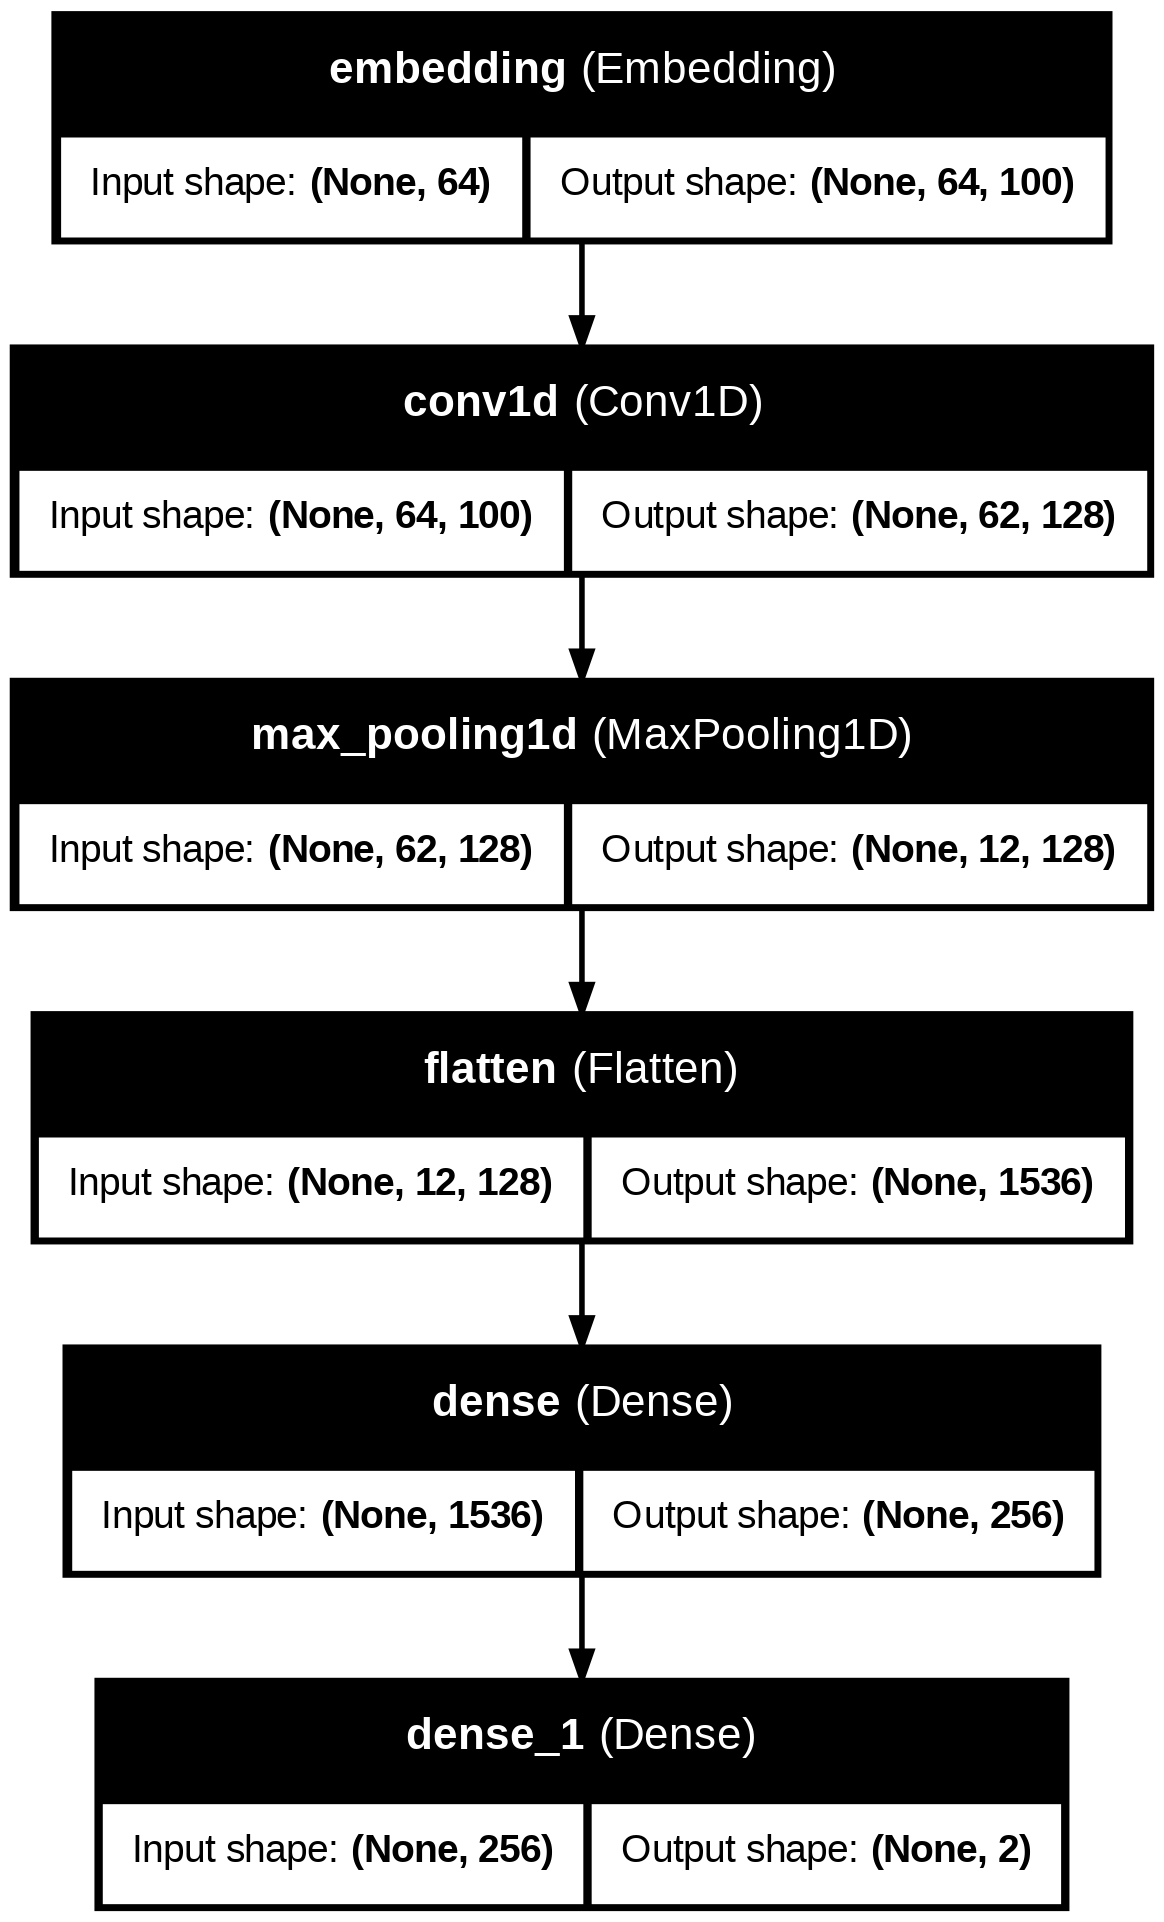

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size + 1, output_dim = 100,input_length=embedding_vecor_length))
model.add(Conv1D(filters = 128,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.build(input_shape=(None, embedding_vecor_length)) # Specify input_shape here
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),
              epochs=2,batch_size=100, verbose=2)

Epoch 1/2
39/39 - 5s - 137ms/step - accuracy: 0.8513 - loss: 0.3177 - val_accuracy: 0.8624 - val_loss: 0.2093
Epoch 2/2
39/39 - 2s - 60ms/step - accuracy: 0.9369 - loss: 0.1567 - val_accuracy: 0.9761 - val_loss: 0.1296


In [ ]:
predictions_test = model.predict(X_test)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


# **Result Processing**

In [ ]:
predictions_test

array([[9.9994558e-01, 5.4360495e-05],
       [9.9993449e-01, 6.5392938e-05],
       [9.9999040e-01, 9.5868190e-06],
       ...,
       [9.9992591e-01, 7.4021089e-05],
       [9.9994713e-01, 5.2772913e-05],
       [9.9999112e-01, 8.7699227e-06]], dtype=float32)

In [ ]:
predictions_test1 = np.zeros_like(predictions_test)
predictions_test1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
predictions_test1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1442
           1       0.99      0.83      0.91       230

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.98      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672
 samples avg       0.98      0.98      0.98      1672

